In [21]:
import pickle

import pandas as pd 
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
dataset = pd.read_csv('population_increase_vs_renewable_energies.csv')

In [23]:
dataset.isna().sum()

Population Increase                      0
Other renewables (TWh, direct energy)    0
Solar (TWh, direct energy)               0
Wind (TWh, direct energy)                0
Hydropower (TWh, direct energy)          0
dtype: int64

In [24]:
dataset.corr()

,Population Increase,"Other renewables (TWh, direct energy)","Solar (TWh, direct energy)","Wind (TWh, direct energy)","Hydropower (TWh, direct energy)"
Population Increase,1.000000,0.395194,0.097411,0.178865,0.708125
"Other renewables (TWh, direct energy)",0.395194,1.000000,0.819071,0.924340,0.911950
"Solar (TWh, direct energy)",0.097411,0.819071,1.000000,0.963026,0.606851
"Wind (TWh, direct energy)",0.178865,0.924340,0.963026,1.000000,0.727229
"Hydropower (TWh, direct energy)",0.708125,0.911950,0.606851,0.727229,1.000000


<AxesSubplot:>

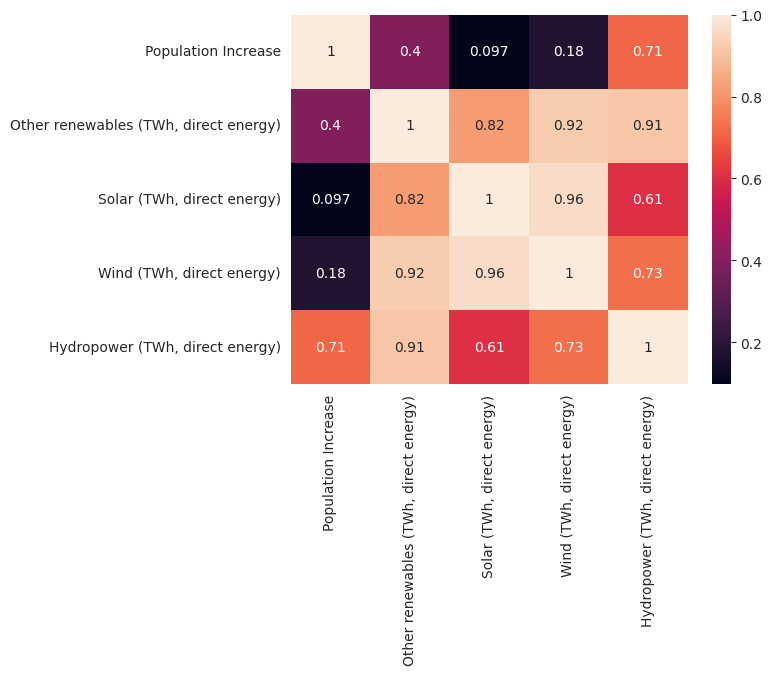

In [25]:
import seaborn as sns

sns.heatmap(dataset.corr(), annot=True)

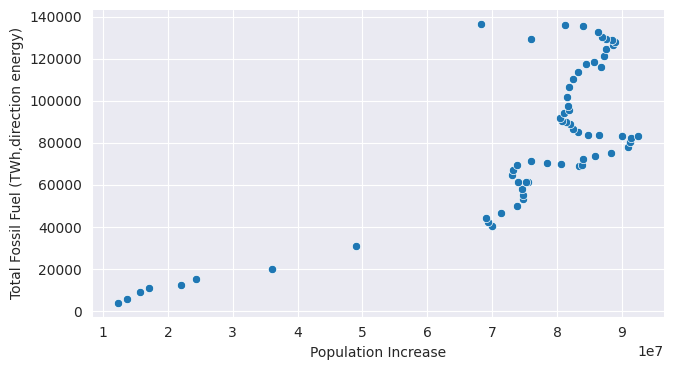

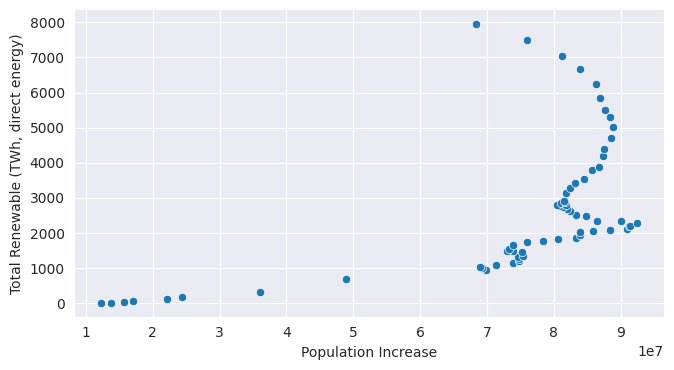

In [6]:
sns.relplot(x='Population Increase', y='Total Fossil Fuel (TWh,direction energy)', data=dataset,
            height=3.8, aspect=1.8, kind='scatter')
sns.relplot(x='Population Increase', y='Total Renewable (TWh, direct energy)', data=dataset,
            height=3.8, aspect=1.8, kind='scatter')
sns.set_style('dark')

In [52]:
column = "Wind (TWh, direct energy)"

new_dataset = dataset[["Population Increase", column]]
new_dataset = new_dataset[new_dataset[column] != 0]

X = new_dataset[["Population Increase"]].values  # feature matrix
y = new_dataset[column].values  # response vector

In [53]:
new_dataset

,Population Increase,"Wind (TWh, direct energy)"
21,73885184.0,0.003000
22,75925248.0,0.006000
23,78425088.0,0.010500
24,80619520.0,0.010500
25,83357184.0,0.018500
26,83899392.0,0.032795
27,83952128.0,0.044756
28,85894656.0,0.064220
29,88332288.0,0.138831
30,90921472.0,0.195377


In [54]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)
# 
# X_poly = poly.fit_transform(X.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39, 1)
(5, 1)
(39,)
(5,)


Estimators: 10
Train score: 0.7006924305677635
Test score: -41.171595607212275
Score: -205.5076318207775
-----------------------------------
Estimators: 20
Train score: 0.7845301782340612
Test score: -17.078580737758777
Score: -85.00063859967686
-----------------------------------
Estimators: 50
Train score: 0.7750910195349033
Test score: -27.675866570599684
Score: -137.99178734323098
-----------------------------------
Estimators: 100
Train score: 0.781067065176093
Test score: -31.436211015944174
Score: -156.7905215471328
-----------------------------------
Estimators: 250
Train score: 0.7701421941833955
Test score: -40.12880547728179
Score: -200.25895628931724
-----------------------------------
Estimators: 500
Train score: 0.7809556913224659
Test score: -33.98758952640161
Score: -169.54746978634682
-----------------------------------
Estimators: 750
Train score: 0.7896308648859859
Test score: -36.926495018443084
Score: -184.23765965977245
-----------------------------------
Estimato

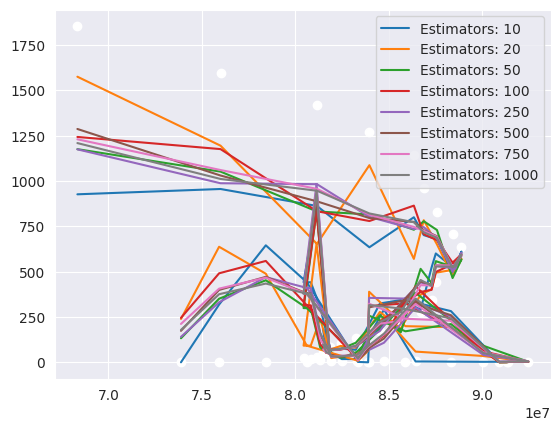

Max score: -85.00063859967686
Max score estimator: 20


RandomForestRegressor(n_estimators=20, n_jobs=-1, oob_score=True,
                      random_state=0)

In [56]:
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

estimators = [10, 20, 50, 100, 250, 500, 750, 1000]
# colors = ['red', 'green', 'blue', 'yellow', 'black']

maxScoreEstimator = 0
maxScore = -2147483648
for i in estimators:
    regressorTest = RandomForestRegressor(n_estimators=i, n_jobs=-1)
    regressorTest.fit(X_train, y_train)
    trainScore = regressorTest.score(X_train, y_train)
    testScore = regressorTest.score(X_test, y_test)
    print(f"Estimators: {i}")
    print(f"Train score: {trainScore}")
    print(f"Test score: {testScore}")
    score = (trainScore / 2) + (testScore * 5)
    print(f"Score: {score}")
    y_predict = regressorTest.predict(X)
    

    if score > maxScore:
        maxScore = score
        maxScoreEstimator = i
    plt.plot(X, y_predict, label=f"Estimators: {i}")
    print("-----------------------------------")
# regressor = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
# regressor.fit(X_train, y_train)
plt.scatter(X, y, color='white')
plt.legend()
plt.show()

print(f"Max score: {maxScore}")
print(f"Max score estimator: {maxScoreEstimator}")

regressor = RandomForestRegressor(n_estimators=maxScoreEstimator, oob_score=True, random_state=0, n_jobs=-1)
regressor.fit(X_train, y_train)

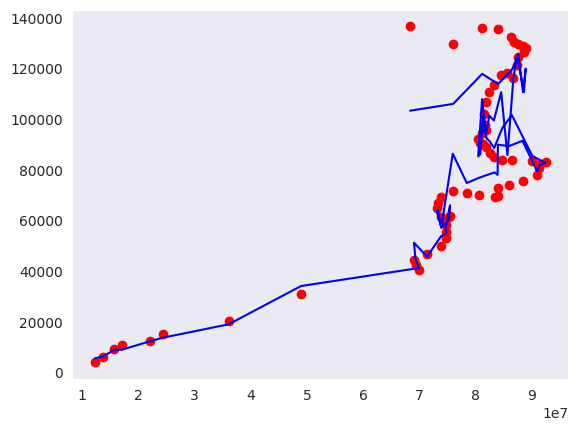

In [11]:
y_predict = regressor.predict(X)

plt.scatter(X, y, color='red')
plt.plot(X, y_predict, color='blue')

In [12]:
y_pred = regressor.predict(X_test)
y_pred

array([1.06561114e+09, 1.18365846e+08, 2.71892972e+09, 7.43357515e+09,
       2.34730264e+09, 2.71182786e+09, 1.06976050e+08, 5.27014062e+08,
       3.39062799e+09, 5.78062745e+07, 2.99358455e+08, 2.23228901e+10,
       2.56857333e+10, 1.31349286e+10, 3.27331455e+10, 8.62194321e+07,
       1.33506520e+09, 3.42575279e+10, 2.45299648e+09, 7.54154864e+09,
       2.56857333e+10, 1.12156777e+10, 3.27967123e+10])

In [13]:
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
comparison_df

,Actual,Predicted
0,1.372396e+09,1.065611e+09
1,9.739960e+07,1.183658e+08
2,2.534733e+09,2.718930e+09
3,6.381406e+09,7.433575e+09
4,1.194624e+09,2.347303e+09
5,2.254100e+09,2.711828e+09
6,3.014812e+08,1.069761e+08
7,1.188085e+08,5.270141e+08
8,1.300362e+09,3.390628e+09
9,3.125182e+07,5.780627e+07


In [14]:
residuals = y_test - y_pred
residuals

array([ 3.06785359e+08, -2.09662462e+07, -1.84196715e+08, -1.05216945e+09,
       -1.15267864e+09, -4.57727657e+08,  1.94505200e+08, -4.08205552e+08,
       -2.09026559e+09, -2.65544565e+07,  7.88217045e+07, -2.45505090e+08,
       -6.66878329e+09, -1.27322059e+09,  1.70332454e+09, -4.12787209e+06,
        5.18643998e+08, -1.16903289e+10,  4.37498522e+08,  1.31311336e+09,
       -8.52238293e+08,  9.40122730e+07,  2.66650066e+09])

Text(0, 0.5, 'Predictions')

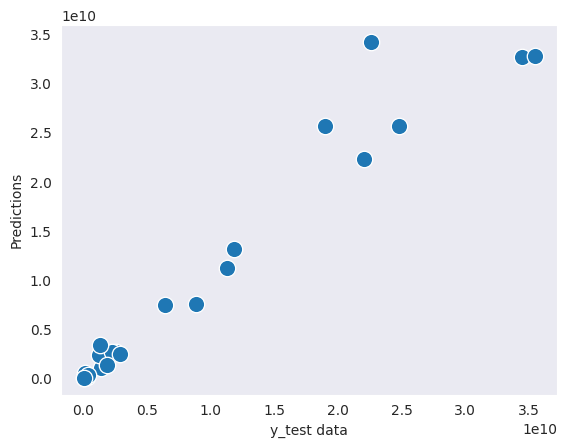

In [15]:
import matplotlib.pyplot as plt

sns.scatterplot(x=y_test, y=y_pred, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

In [12]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score


def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()


def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')


def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [51]:
import pickle

pickle.dump(regressor, open('population_increase_vs_solar.pkl', 'wb'))

In [15]:
# import pickle
# model = pickle.load(open('populationincrease-annualco2.pkl','rb'))
print(regressor.score(X_test, y_test))
print(regressor.score(X_train, y_train))

0.9131316293456435
0.9120183909461399


In [20]:
import numpy as np

test_pred = regressor.predict(X_test)
train_pred = regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred), cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])


Test set evaluation:
_____________________________________
MAE: 10297.963485000137
MSE: 187702983.1010382
RMSE: 13700.473827610424
R2 Square 0.8738989201117189
__________________________________
Train set evaluation:
_____________________________________
MAE: 6581.647398206845
MSE: 94719394.45305389
RMSE: 9732.38893864471
R2 Square 0.9248188392923131
__________________________________


In [33]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

3017047152.5089083

In [34]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9276890523805622